Choices:
- similarity in words (bag of words representation)
- similarity in vectors (need to use pretrained model or gensim doc-2-vec)

Resource: https://towardsdatascience.com/calculating-document-similarities-using-bert-and-other-models-b2c1a29c9630


## Compute similarity of words in documents between clean-OCR and Ground Truth

- create matrix of documents
- compute tfidf vector for each
- compute cosine similarity between vectors



In [1]:
import pandas as pd
import numpy as np
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import os
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
text_df = pd.read_pickle("../data/all_text.pkl")

In [3]:
# Transform the cleaned text into tf-idf vectors

tfidfvectoriser = TfidfVectorizer()
tfidfvectoriser.fit(text_df.text_cleaned)

tfidf_vectors = tfidfvectoriser.transform(text_df.text_cleaned)

In [4]:
pairwise_similarities = np.dot(tfidf_vectors,tfidf_vectors.T).toarray()

In [5]:
pairwise_similarities

array([[1.        , 0.068126  , 0.05587035, 0.04974826, 0.65136894,
        0.06490058, 0.05519927, 0.04918725],
       [0.068126  , 1.        , 0.16046372, 0.47892503, 0.08717049,
        0.95410647, 0.16241742, 0.48834374],
       [0.05587035, 0.16046372, 1.        , 0.22312002, 0.06129849,
        0.16447724, 0.97880099, 0.2265503 ],
       [0.04974826, 0.47892503, 0.22312002, 1.        , 0.05107653,
        0.482953  , 0.22150307, 0.97733077],
       [0.65136894, 0.08717049, 0.06129849, 0.05107653, 1.        ,
        0.09380873, 0.0638339 , 0.05632599],
       [0.06490058, 0.95410647, 0.16447724, 0.482953  , 0.09380873,
        1.        , 0.16919667, 0.49514527],
       [0.05519927, 0.16241742, 0.97880099, 0.22150307, 0.0638339 ,
        0.16919667, 1.        , 0.23365317],
       [0.04918725, 0.48834374, 0.2265503 , 0.97733077, 0.05632599,
        0.49514527, 0.23365317, 1.        ]])

In [6]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

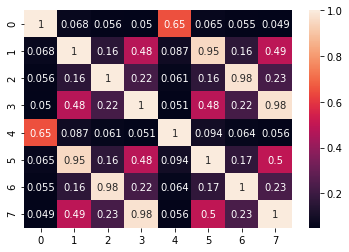

In [7]:
sns.heatmap(pd.DataFrame(pairwise_similarities), annot=True)

### Observations:

1. the HR text, which was just a tire-fire of OCR, ended with a 65% similarity on words between the corrected OCR and the ground-truth document. 
2. The YI text, which was the next most problematic text, had 95% similarity when comparing just the words.
3. The SI text tied with the RH text at 98% similarity between the OCR and corrected text. However, the SI text is the one where three columns were merged. This measure is accurate, but does not capture the layout errors we are most interested in. 

## Compare paragraph similarity with Gensim and doc2vec

In [8]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [9]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
# nltk.download('punkt')

/Users/jeriwieringa/opt/anaconda3/envs/ocr/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [10]:
tagged_data = [TaggedDocument(words = word_tokenize(doc), tags=[i]) for i, doc in enumerate(text_df.text_cleaned)]

In [11]:
num_features = 300
model_d2v = Doc2Vec(vector_size=num_features, alpha=0.025) 

model_d2v.build_vocab(tagged_data)

2021-07-20 20:56:50,267 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d300,n5,w5,mc5,s0.001,t3)', 'datetime': '2021-07-20T20:56:50.223958', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2021-07-20 20:56:50,274 : INFO : collecting all words and their counts
2021-07-20 20:56:50,276 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2021-07-20 20:56:50,281 : INFO : collected 1592 word types and 8 unique tags from a corpus of 8 examples and 6766 words
2021-07-20 20:56:50,283 : INFO : Creating a fresh vocabulary
2021-07-20 20:56:50,288 : INFO : Doc2Vec lifecycle event {'msg': 'effective_min_count=5 retains 301 unique words (18.907035175879397%% of original 1592, drops 1291)', 'datetime': '2021-07-20T20:56:50.288458', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-6

In [12]:
model_d2v[0]

array([-1.78742412e-04,  7.88100588e-05,  1.70111656e-03,  3.00309109e-03,
       -3.10098333e-03, -2.37226952e-03,  2.15295702e-03,  2.99099600e-03,
       -1.67180935e-03, -1.25445763e-03,  2.46016821e-03, -5.11157501e-04,
       -1.51220476e-03,  2.18468346e-03, -1.62005343e-03, -6.05339184e-04,
        9.58859921e-04,  3.30624578e-04, -2.76173837e-03, -3.14960629e-03,
        2.43725535e-03,  1.69008737e-03,  2.25256453e-03,  2.54288519e-04,
        2.11696303e-03, -1.13512203e-03, -3.15467507e-04,  1.92285771e-03,
       -2.50721304e-03, -1.31203490e-03, -2.50386074e-03, -3.10014089e-04,
        3.17937299e-03, -2.43972219e-03, -7.77923269e-04, -6.45914057e-04,
        2.69247848e-03, -1.97696523e-03,  1.50537489e-05, -1.58457831e-03,
       -3.20118340e-03,  1.66909769e-03, -2.91986228e-03, -1.46394176e-03,
       -1.16999945e-05, -9.87275416e-05, -2.55374680e-03,  3.20491404e-03,
        1.66068552e-03,  3.07771447e-03, -2.71930615e-03,  1.49859907e-03,
       -1.37902575e-03,  

In [13]:
for epoch in range(100):
    model_d2v.train(tagged_data,
                total_examples = model_d2v.corpus_count,
                epochs = model_d2v.epochs)

2021-07-20 20:56:50,348 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:56:50.348228', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:50,355 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:50,358 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:50,374 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:50,375 : INFO : EPOCH - 1 : training on 6766 raw words (2807 effective words) took 0.0s, 128377 effective words/s
2021-07-20 20:56:50,380 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:50,382 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:50,394 : INFO : wor

2021-07-20 20:56:50,740 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:50,741 : INFO : EPOCH - 8 : training on 6766 raw words (2846 effective words) took 0.0s, 177470 effective words/s
2021-07-20 20:56:50,745 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:50,747 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:50,759 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:50,760 : INFO : EPOCH - 9 : training on 6766 raw words (2854 effective words) took 0.0s, 188358 effective words/s
2021-07-20 20:56:50,766 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:50,769 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:50,780 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:50,781 : INFO : EPOCH - 10 : training on 6766 raw words (2838 effective words) took 

2021-07-20 20:56:51,063 : INFO : EPOCH - 4 : training on 6766 raw words (2822 effective words) took 0.0s, 158120 effective words/s
2021-07-20 20:56:51,070 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:51,073 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:51,085 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:51,086 : INFO : EPOCH - 5 : training on 6766 raw words (2835 effective words) took 0.0s, 183099 effective words/s
2021-07-20 20:56:51,089 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:51,091 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:51,102 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:51,104 : INFO : EPOCH - 6 : training on 6766 raw words (2877 effective words) took 0.0s, 202147 effective words/s
2021-07-20 20:56:51,109 : INFO : worker thread finished; awai

2021-07-20 20:56:51,396 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:51,398 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:51,412 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:51,413 : INFO : EPOCH - 1 : training on 6766 raw words (2844 effective words) took 0.0s, 162846 effective words/s
2021-07-20 20:56:51,419 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:51,422 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:51,434 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:51,434 : INFO : EPOCH - 2 : training on 6766 raw words (2823 effective words) took 0.0s, 181566 effective words/s
2021-07-20 20:56:51,439 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:51,441 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:56:51,781 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:51,782 : INFO : EPOCH - 9 : training on 6766 raw words (2820 effective words) took 0.0s, 179845 effective words/s
2021-07-20 20:56:51,786 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:51,788 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:51,799 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:51,800 : INFO : EPOCH - 10 : training on 6766 raw words (2865 effective words) took 0.0s, 208986 effective words/s
2021-07-20 20:56:51,801 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28364 effective words) took 0.2s, 146505 effective words/s', 'datetime': '2021-07-20T20:56:51.801315', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:51,80

2021-07-20 20:56:52,099 : INFO : EPOCH - 5 : training on 6766 raw words (2842 effective words) took 0.0s, 203184 effective words/s
2021-07-20 20:56:52,103 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:52,105 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:52,118 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:52,119 : INFO : EPOCH - 6 : training on 6766 raw words (2817 effective words) took 0.0s, 175227 effective words/s
2021-07-20 20:56:52,124 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:52,126 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:52,136 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:52,137 : INFO : EPOCH - 7 : training on 6766 raw words (2827 effective words) took 0.0s, 217937 effective words/s
2021-07-20 20:56:52,142 : INFO : worker thread finished; awai

2021-07-20 20:56:52,444 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:52,446 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:52,454 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:52,456 : INFO : EPOCH - 2 : training on 6766 raw words (2815 effective words) took 0.0s, 231286 effective words/s
2021-07-20 20:56:52,460 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:52,463 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:52,475 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:52,476 : INFO : EPOCH - 3 : training on 6766 raw words (2841 effective words) took 0.0s, 179101 effective words/s
2021-07-20 20:56:52,481 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:52,483 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:56:52,804 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:52,805 : INFO : EPOCH - 10 : training on 6766 raw words (2824 effective words) took 0.0s, 206531 effective words/s
2021-07-20 20:56:52,806 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28427 effective words) took 0.2s, 147793 effective words/s', 'datetime': '2021-07-20T20:56:52.806596', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:52,808 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:56:52,810 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:56:52.810641', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-1

2021-07-20 20:56:53,116 : INFO : EPOCH - 6 : training on 6766 raw words (2826 effective words) took 0.0s, 193784 effective words/s
2021-07-20 20:56:53,123 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:53,126 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:53,139 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:53,140 : INFO : EPOCH - 7 : training on 6766 raw words (2827 effective words) took 0.0s, 162179 effective words/s
2021-07-20 20:56:53,146 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:53,147 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:53,159 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:53,160 : INFO : EPOCH - 8 : training on 6766 raw words (2839 effective words) took 0.0s, 191828 effective words/s
2021-07-20 20:56:53,166 : INFO : worker thread finished; awai

2021-07-20 20:56:53,455 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:53,456 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:53,470 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:53,472 : INFO : EPOCH - 3 : training on 6766 raw words (2849 effective words) took 0.0s, 158681 effective words/s
2021-07-20 20:56:53,477 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:53,479 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:53,490 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:53,491 : INFO : EPOCH - 4 : training on 6766 raw words (2857 effective words) took 0.0s, 209754 effective words/s
2021-07-20 20:56:53,496 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:53,499 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:56:53,815 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:56:53,817 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:56:53.817695', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:53,822 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:53,824 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:53,837 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:53,838 : INFO : EPOCH - 1 : training on 6766 raw words (2792 effective words) took 0.0s, 175201 effective words/s
2021-07-20 20:56:53,842 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:53,844 : INFO : wor

2021-07-20 20:56:54,180 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:54,192 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:54,194 : INFO : EPOCH - 8 : training on 6766 raw words (2851 effective words) took 0.0s, 161305 effective words/s
2021-07-20 20:56:54,203 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:54,209 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:54,219 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:54,220 : INFO : EPOCH - 9 : training on 6766 raw words (2866 effective words) took 0.0s, 168979 effective words/s
2021-07-20 20:56:54,224 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:54,226 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:54,237 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20

2021-07-20 20:56:54,521 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:54,522 : INFO : EPOCH - 4 : training on 6766 raw words (2797 effective words) took 0.0s, 166487 effective words/s
2021-07-20 20:56:54,527 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:54,529 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:54,540 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:54,541 : INFO : EPOCH - 5 : training on 6766 raw words (2814 effective words) took 0.0s, 198105 effective words/s
2021-07-20 20:56:54,547 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:54,549 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:54,559 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:54,561 : INFO : EPOCH - 6 : training on 6766 raw words (2822 effective words) took 0

2021-07-20 20:56:54,865 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:54,868 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:54,880 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:54,880 : INFO : EPOCH - 1 : training on 6766 raw words (2775 effective words) took 0.0s, 181972 effective words/s
2021-07-20 20:56:54,886 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:54,888 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:54,898 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:54,899 : INFO : EPOCH - 2 : training on 6766 raw words (2842 effective words) took 0.0s, 218530 effective words/s
2021-07-20 20:56:54,904 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:54,905 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:56:55,226 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:55,228 : INFO : EPOCH - 9 : training on 6766 raw words (2819 effective words) took 0.0s, 160776 effective words/s
2021-07-20 20:56:55,232 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:55,235 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:55,246 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:55,247 : INFO : EPOCH - 10 : training on 6766 raw words (2867 effective words) took 0.0s, 197524 effective words/s
2021-07-20 20:56:55,248 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28419 effective words) took 0.2s, 147622 effective words/s', 'datetime': '2021-07-20T20:56:55.248097', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:55,24

2021-07-20 20:56:55,568 : INFO : EPOCH - 5 : training on 6766 raw words (2839 effective words) took 0.0s, 160504 effective words/s
2021-07-20 20:56:55,574 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:55,576 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:55,585 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:55,585 : INFO : EPOCH - 6 : training on 6766 raw words (2846 effective words) took 0.0s, 247185 effective words/s
2021-07-20 20:56:55,590 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:55,591 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:55,600 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:55,601 : INFO : EPOCH - 7 : training on 6766 raw words (2830 effective words) took 0.0s, 242091 effective words/s
2021-07-20 20:56:55,606 : INFO : worker thread finished; awai

2021-07-20 20:56:55,882 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:55,885 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:55,894 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:55,895 : INFO : EPOCH - 2 : training on 6766 raw words (2857 effective words) took 0.0s, 222218 effective words/s
2021-07-20 20:56:55,899 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:55,901 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:55,913 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:55,914 : INFO : EPOCH - 3 : training on 6766 raw words (2834 effective words) took 0.0s, 189738 effective words/s
2021-07-20 20:56:55,919 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:55,922 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:56:56,236 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:56,237 : INFO : EPOCH - 10 : training on 6766 raw words (2856 effective words) took 0.0s, 218457 effective words/s
2021-07-20 20:56:56,238 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28363 effective words) took 0.2s, 149925 effective words/s', 'datetime': '2021-07-20T20:56:56.238671', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:56,239 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:56:56,240 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:56:56.240621', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-1

2021-07-20 20:56:56,558 : INFO : EPOCH - 6 : training on 6766 raw words (2859 effective words) took 0.0s, 180608 effective words/s
2021-07-20 20:56:56,563 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:56,567 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:56,578 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:56,580 : INFO : EPOCH - 7 : training on 6766 raw words (2859 effective words) took 0.0s, 167814 effective words/s
2021-07-20 20:56:56,584 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:56,586 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:56,596 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:56,596 : INFO : EPOCH - 8 : training on 6766 raw words (2860 effective words) took 0.0s, 229273 effective words/s
2021-07-20 20:56:56,601 : INFO : worker thread finished; awai

2021-07-20 20:56:56,896 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:56,899 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:56,908 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:56,909 : INFO : EPOCH - 3 : training on 6766 raw words (2880 effective words) took 0.0s, 221061 effective words/s
2021-07-20 20:56:56,916 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:56,918 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:56,930 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:56,931 : INFO : EPOCH - 4 : training on 6766 raw words (2835 effective words) took 0.0s, 192216 effective words/s
2021-07-20 20:56:56,934 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:56,936 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:56:57,245 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:56:57,246 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:56:57.245981', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:57,250 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:57,251 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:57,263 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:57,264 : INFO : EPOCH - 1 : training on 6766 raw words (2854 effective words) took 0.0s, 193676 effective words/s
2021-07-20 20:56:57,269 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:57,271 : INFO : wor

2021-07-20 20:56:57,570 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:57,581 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:57,582 : INFO : EPOCH - 8 : training on 6766 raw words (2799 effective words) took 0.0s, 203208 effective words/s
2021-07-20 20:56:57,586 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:57,588 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:57,597 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:57,598 : INFO : EPOCH - 9 : training on 6766 raw words (2866 effective words) took 0.0s, 230354 effective words/s
2021-07-20 20:56:57,603 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:57,606 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:57,617 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20

2021-07-20 20:56:57,888 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:57,889 : INFO : EPOCH - 4 : training on 6766 raw words (2832 effective words) took 0.0s, 213650 effective words/s
2021-07-20 20:56:57,893 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:57,895 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:57,905 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:57,906 : INFO : EPOCH - 5 : training on 6766 raw words (2819 effective words) took 0.0s, 225624 effective words/s
2021-07-20 20:56:57,910 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:57,914 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:57,925 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:57,926 : INFO : EPOCH - 6 : training on 6766 raw words (2868 effective words) took 0

2021-07-20 20:56:58,199 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:58,201 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:58,216 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:58,217 : INFO : EPOCH - 1 : training on 6766 raw words (2867 effective words) took 0.0s, 159645 effective words/s
2021-07-20 20:56:58,224 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:58,226 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:58,237 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:58,238 : INFO : EPOCH - 2 : training on 6766 raw words (2849 effective words) took 0.0s, 200776 effective words/s
2021-07-20 20:56:58,242 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:58,245 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:56:58,553 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:58,554 : INFO : EPOCH - 9 : training on 6766 raw words (2834 effective words) took 0.0s, 227133 effective words/s
2021-07-20 20:56:58,558 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:58,560 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:58,572 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:58,574 : INFO : EPOCH - 10 : training on 6766 raw words (2879 effective words) took 0.0s, 183522 effective words/s
2021-07-20 20:56:58,575 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28481 effective words) took 0.2s, 152540 effective words/s', 'datetime': '2021-07-20T20:56:58.575129', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:58,57

2021-07-20 20:56:58,855 : INFO : EPOCH - 5 : training on 6766 raw words (2861 effective words) took 0.0s, 221563 effective words/s
2021-07-20 20:56:58,858 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:58,860 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:58,873 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:58,874 : INFO : EPOCH - 6 : training on 6766 raw words (2802 effective words) took 0.0s, 179084 effective words/s
2021-07-20 20:56:58,878 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:58,882 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:58,894 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:58,895 : INFO : EPOCH - 7 : training on 6766 raw words (2827 effective words) took 0.0s, 166452 effective words/s
2021-07-20 20:56:58,900 : INFO : worker thread finished; awai

2021-07-20 20:56:59,166 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:59,170 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:59,180 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:59,181 : INFO : EPOCH - 2 : training on 6766 raw words (2826 effective words) took 0.0s, 177808 effective words/s
2021-07-20 20:56:59,186 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:59,188 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:59,199 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:59,200 : INFO : EPOCH - 3 : training on 6766 raw words (2855 effective words) took 0.0s, 198789 effective words/s
2021-07-20 20:56:59,204 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:59,206 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:56:59,548 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:59,549 : INFO : EPOCH - 10 : training on 6766 raw words (2809 effective words) took 0.0s, 170217 effective words/s
2021-07-20 20:56:59,553 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28377 effective words) took 0.2s, 135277 effective words/s', 'datetime': '2021-07-20T20:56:59.553038', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:56:59,554 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:56:59,555 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:56:59.555808', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-1

2021-07-20 20:56:59,885 : INFO : EPOCH - 6 : training on 6766 raw words (2872 effective words) took 0.0s, 213879 effective words/s
2021-07-20 20:56:59,888 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:59,890 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:59,901 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:59,903 : INFO : EPOCH - 7 : training on 6766 raw words (2841 effective words) took 0.0s, 196830 effective words/s
2021-07-20 20:56:59,906 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:56:59,907 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:56:59,921 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:56:59,922 : INFO : EPOCH - 8 : training on 6766 raw words (2836 effective words) took 0.0s, 167812 effective words/s
2021-07-20 20:56:59,929 : INFO : worker thread finished; awai

2021-07-20 20:57:00,286 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:00,288 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:00,300 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:00,301 : INFO : EPOCH - 3 : training on 6766 raw words (2900 effective words) took 0.0s, 185596 effective words/s
2021-07-20 20:57:00,307 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:00,310 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:00,323 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:00,324 : INFO : EPOCH - 4 : training on 6766 raw words (2850 effective words) took 0.0s, 165955 effective words/s
2021-07-20 20:57:00,329 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:00,333 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:00,679 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:57:00,681 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:57:00.681043', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:00,685 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:00,689 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:00,699 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:00,701 : INFO : EPOCH - 1 : training on 6766 raw words (2816 effective words) took 0.0s, 185466 effective words/s
2021-07-20 20:57:00,706 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:00,709 : INFO : wor

2021-07-20 20:57:01,044 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:01,056 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:01,058 : INFO : EPOCH - 8 : training on 6766 raw words (2860 effective words) took 0.0s, 183129 effective words/s
2021-07-20 20:57:01,065 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:01,067 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:01,079 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:01,080 : INFO : EPOCH - 9 : training on 6766 raw words (2793 effective words) took 0.0s, 186184 effective words/s
2021-07-20 20:57:01,084 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:01,087 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:01,098 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20

2021-07-20 20:57:01,391 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:01,392 : INFO : EPOCH - 4 : training on 6766 raw words (2845 effective words) took 0.0s, 223241 effective words/s
2021-07-20 20:57:01,397 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:01,398 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:01,409 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:01,411 : INFO : EPOCH - 5 : training on 6766 raw words (2862 effective words) took 0.0s, 204138 effective words/s
2021-07-20 20:57:01,418 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:01,421 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:01,430 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:01,431 : INFO : EPOCH - 6 : training on 6766 raw words (2866 effective words) took 0

2021-07-20 20:57:01,714 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:01,718 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:01,729 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:01,730 : INFO : EPOCH - 1 : training on 6766 raw words (2837 effective words) took 0.0s, 177395 effective words/s
2021-07-20 20:57:01,734 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:01,736 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:01,746 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:01,747 : INFO : EPOCH - 2 : training on 6766 raw words (2828 effective words) took 0.0s, 222504 effective words/s
2021-07-20 20:57:01,752 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:01,753 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:02,086 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:02,088 : INFO : EPOCH - 9 : training on 6766 raw words (2841 effective words) took 0.0s, 133662 effective words/s
2021-07-20 20:57:02,096 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:02,098 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:02,109 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:02,112 : INFO : EPOCH - 10 : training on 6766 raw words (2836 effective words) took 0.0s, 185167 effective words/s
2021-07-20 20:57:02,114 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28319 effective words) took 0.2s, 134322 effective words/s', 'datetime': '2021-07-20T20:57:02.114080', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:02,11

2021-07-20 20:57:02,461 : INFO : EPOCH - 5 : training on 6766 raw words (2819 effective words) took 0.0s, 204915 effective words/s
2021-07-20 20:57:02,467 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:02,471 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:02,480 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:02,481 : INFO : EPOCH - 6 : training on 6766 raw words (2866 effective words) took 0.0s, 198098 effective words/s
2021-07-20 20:57:02,487 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:02,489 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:02,499 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:02,500 : INFO : EPOCH - 7 : training on 6766 raw words (2826 effective words) took 0.0s, 211210 effective words/s
2021-07-20 20:57:02,505 : INFO : worker thread finished; awai

2021-07-20 20:57:02,788 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:02,790 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:02,802 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:02,804 : INFO : EPOCH - 2 : training on 6766 raw words (2809 effective words) took 0.0s, 181261 effective words/s
2021-07-20 20:57:02,808 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:02,810 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:02,822 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:02,823 : INFO : EPOCH - 3 : training on 6766 raw words (2827 effective words) took 0.0s, 166334 effective words/s
2021-07-20 20:57:02,828 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:02,831 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:03,134 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:03,135 : INFO : EPOCH - 10 : training on 6766 raw words (2861 effective words) took 0.0s, 224901 effective words/s
2021-07-20 20:57:03,136 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28503 effective words) took 0.2s, 154776 effective words/s', 'datetime': '2021-07-20T20:57:03.136477', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:03,137 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:57:03,138 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:57:03.138788', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-1

2021-07-20 20:57:03,436 : INFO : EPOCH - 6 : training on 6766 raw words (2853 effective words) took 0.0s, 242094 effective words/s
2021-07-20 20:57:03,441 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:03,443 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:03,452 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:03,453 : INFO : EPOCH - 7 : training on 6766 raw words (2811 effective words) took 0.0s, 227196 effective words/s
2021-07-20 20:57:03,459 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:03,462 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:03,472 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:03,473 : INFO : EPOCH - 8 : training on 6766 raw words (2851 effective words) took 0.0s, 196407 effective words/s
2021-07-20 20:57:03,479 : INFO : worker thread finished; awai

2021-07-20 20:57:03,760 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:03,762 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:03,775 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:03,776 : INFO : EPOCH - 3 : training on 6766 raw words (2842 effective words) took 0.0s, 173736 effective words/s
2021-07-20 20:57:03,784 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:03,787 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:03,800 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:03,801 : INFO : EPOCH - 4 : training on 6766 raw words (2865 effective words) took 0.0s, 153352 effective words/s
2021-07-20 20:57:03,806 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:03,810 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:04,097 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:57:04,098 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:57:04.098947', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:04,103 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:04,104 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:04,117 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:04,118 : INFO : EPOCH - 1 : training on 6766 raw words (2836 effective words) took 0.0s, 184516 effective words/s
2021-07-20 20:57:04,123 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:04,126 : INFO : wor

2021-07-20 20:57:04,423 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:04,432 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:04,433 : INFO : EPOCH - 8 : training on 6766 raw words (2807 effective words) took 0.0s, 204844 effective words/s
2021-07-20 20:57:04,439 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:04,441 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:04,450 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:04,451 : INFO : EPOCH - 9 : training on 6766 raw words (2881 effective words) took 0.0s, 241763 effective words/s
2021-07-20 20:57:04,455 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:04,458 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:04,469 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20

2021-07-20 20:57:04,733 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:04,734 : INFO : EPOCH - 4 : training on 6766 raw words (2831 effective words) took 0.0s, 215744 effective words/s
2021-07-20 20:57:04,736 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:04,739 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:04,747 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:04,748 : INFO : EPOCH - 5 : training on 6766 raw words (2854 effective words) took 0.0s, 243314 effective words/s
2021-07-20 20:57:04,751 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:04,752 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:04,766 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:04,767 : INFO : EPOCH - 6 : training on 6766 raw words (2848 effective words) took 0

2021-07-20 20:57:05,031 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:05,033 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:05,043 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:05,044 : INFO : EPOCH - 1 : training on 6766 raw words (2825 effective words) took 0.0s, 222486 effective words/s
2021-07-20 20:57:05,048 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:05,051 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:05,061 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:05,063 : INFO : EPOCH - 2 : training on 6766 raw words (2851 effective words) took 0.0s, 184250 effective words/s
2021-07-20 20:57:05,068 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:05,071 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:05,379 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:05,380 : INFO : EPOCH - 9 : training on 6766 raw words (2852 effective words) took 0.0s, 188004 effective words/s
2021-07-20 20:57:05,383 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:05,385 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:05,394 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:05,395 : INFO : EPOCH - 10 : training on 6766 raw words (2844 effective words) took 0.0s, 223100 effective words/s
2021-07-20 20:57:05,396 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28500 effective words) took 0.2s, 155573 effective words/s', 'datetime': '2021-07-20T20:57:05.396753', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:05,39

2021-07-20 20:57:05,678 : INFO : EPOCH - 5 : training on 6766 raw words (2810 effective words) took 0.0s, 199754 effective words/s
2021-07-20 20:57:05,684 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:05,685 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:05,695 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:05,696 : INFO : EPOCH - 6 : training on 6766 raw words (2833 effective words) took 0.0s, 208187 effective words/s
2021-07-20 20:57:05,701 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:05,703 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:05,713 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:05,715 : INFO : EPOCH - 7 : training on 6766 raw words (2833 effective words) took 0.0s, 203208 effective words/s
2021-07-20 20:57:05,721 : INFO : worker thread finished; awai

2021-07-20 20:57:05,981 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:05,983 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:05,993 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:05,994 : INFO : EPOCH - 2 : training on 6766 raw words (2822 effective words) took 0.0s, 207619 effective words/s
2021-07-20 20:57:05,999 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:06,002 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:06,012 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:06,013 : INFO : EPOCH - 3 : training on 6766 raw words (2900 effective words) took 0.0s, 190231 effective words/s
2021-07-20 20:57:06,018 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:06,021 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:06,342 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:06,343 : INFO : EPOCH - 10 : training on 6766 raw words (2836 effective words) took 0.0s, 221289 effective words/s
2021-07-20 20:57:06,343 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28482 effective words) took 0.2s, 150252 effective words/s', 'datetime': '2021-07-20T20:57:06.343734', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:06,345 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:57:06,346 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:57:06.346271', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-1

2021-07-20 20:57:06,650 : INFO : EPOCH - 6 : training on 6766 raw words (2851 effective words) took 0.0s, 220470 effective words/s
2021-07-20 20:57:06,656 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:06,658 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:06,670 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:06,671 : INFO : EPOCH - 7 : training on 6766 raw words (2863 effective words) took 0.0s, 177878 effective words/s
2021-07-20 20:57:06,677 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:06,679 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:06,687 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:06,688 : INFO : EPOCH - 8 : training on 6766 raw words (2812 effective words) took 0.0s, 242716 effective words/s
2021-07-20 20:57:06,694 : INFO : worker thread finished; awai

2021-07-20 20:57:06,965 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:06,968 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:06,978 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:06,979 : INFO : EPOCH - 3 : training on 6766 raw words (2816 effective words) took 0.0s, 205030 effective words/s
2021-07-20 20:57:06,983 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:06,984 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:06,994 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:06,995 : INFO : EPOCH - 4 : training on 6766 raw words (2844 effective words) took 0.0s, 232833 effective words/s
2021-07-20 20:57:06,999 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:07,001 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:07,309 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:57:07,310 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:57:07.310885', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:07,316 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:07,319 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:07,329 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:07,330 : INFO : EPOCH - 1 : training on 6766 raw words (2859 effective words) took 0.0s, 193881 effective words/s
2021-07-20 20:57:07,335 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:07,337 : INFO : wor

2021-07-20 20:57:07,624 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:07,633 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:07,634 : INFO : EPOCH - 8 : training on 6766 raw words (2838 effective words) took 0.0s, 228108 effective words/s
2021-07-20 20:57:07,638 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:07,640 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:07,650 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:07,651 : INFO : EPOCH - 9 : training on 6766 raw words (2798 effective words) took 0.0s, 217191 effective words/s
2021-07-20 20:57:07,655 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:07,656 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:07,668 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20

2021-07-20 20:57:07,953 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:07,954 : INFO : EPOCH - 4 : training on 6766 raw words (2835 effective words) took 0.0s, 238364 effective words/s
2021-07-20 20:57:07,959 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:07,962 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:07,973 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:07,974 : INFO : EPOCH - 5 : training on 6766 raw words (2827 effective words) took 0.0s, 177862 effective words/s
2021-07-20 20:57:07,979 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:07,982 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:07,991 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:07,992 : INFO : EPOCH - 6 : training on 6766 raw words (2817 effective words) took 0

2021-07-20 20:57:08,263 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:08,266 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:08,277 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:08,278 : INFO : EPOCH - 1 : training on 6766 raw words (2862 effective words) took 0.0s, 190033 effective words/s
2021-07-20 20:57:08,282 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:08,284 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:08,293 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:08,294 : INFO : EPOCH - 2 : training on 6766 raw words (2862 effective words) took 0.0s, 248235 effective words/s
2021-07-20 20:57:08,298 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:08,300 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:08,622 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:08,624 : INFO : EPOCH - 9 : training on 6766 raw words (2820 effective words) took 0.0s, 171181 effective words/s
2021-07-20 20:57:08,628 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:08,630 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:08,638 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:08,640 : INFO : EPOCH - 10 : training on 6766 raw words (2841 effective words) took 0.0s, 231965 effective words/s
2021-07-20 20:57:08,641 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28340 effective words) took 0.2s, 149378 effective words/s', 'datetime': '2021-07-20T20:57:08.641145', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:08,64

2021-07-20 20:57:08,919 : INFO : EPOCH - 5 : training on 6766 raw words (2887 effective words) took 0.0s, 183783 effective words/s
2021-07-20 20:57:08,924 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:08,927 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:08,934 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:08,935 : INFO : EPOCH - 6 : training on 6766 raw words (2851 effective words) took 0.0s, 249713 effective words/s
2021-07-20 20:57:08,940 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:08,941 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:08,951 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:08,952 : INFO : EPOCH - 7 : training on 6766 raw words (2826 effective words) took 0.0s, 230012 effective words/s
2021-07-20 20:57:08,958 : INFO : worker thread finished; awai

2021-07-20 20:57:09,224 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:09,225 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:09,236 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:09,236 : INFO : EPOCH - 2 : training on 6766 raw words (2828 effective words) took 0.0s, 216643 effective words/s
2021-07-20 20:57:09,241 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:09,243 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:09,252 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:09,253 : INFO : EPOCH - 3 : training on 6766 raw words (2835 effective words) took 0.0s, 227376 effective words/s
2021-07-20 20:57:09,258 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:09,262 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20

2021-07-20 20:57:09,563 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:09,564 : INFO : EPOCH - 10 : training on 6766 raw words (2822 effective words) took 0.0s, 195078 effective words/s
2021-07-20 20:57:09,565 : INFO : Doc2Vec lifecycle event {'msg': 'training on 67660 raw words (28285 effective words) took 0.2s, 156697 effective words/s', 'datetime': '2021-07-20T20:57:09.565897', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'train'}
2021-07-20 20:57:09,567 : WARNING : Effective 'alpha' higher than previous training cycles
2021-07-20 20:57:09,569 : INFO : Doc2Vec lifecycle event {'msg': 'training model with 3 workers on 301 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=5', 'datetime': '2021-07-20T20:57:09.569132', 'gensim': '4.0.1', 'python': '3.8.10 (default, May 19 2021, 11:01:55) \n[Clang 10.0.0 ]', 'platform': 'macOS-1

2021-07-20 20:57:09,854 : INFO : EPOCH - 6 : training on 6766 raw words (2880 effective words) took 0.0s, 227228 effective words/s
2021-07-20 20:57:09,858 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:09,861 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:09,873 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:09,874 : INFO : EPOCH - 7 : training on 6766 raw words (2848 effective words) took 0.0s, 186296 effective words/s
2021-07-20 20:57:09,878 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-07-20 20:57:09,880 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-07-20 20:57:09,889 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-07-20 20:57:09,890 : INFO : EPOCH - 8 : training on 6766 raw words (2810 effective words) took 0.0s, 252747 effective words/s
2021-07-20 20:57:09,893 : INFO : worker thread finished; awai

In [14]:
document_embeddings=np.zeros((text_df.shape[0], num_features))

In [15]:
for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.dv[i]

In [16]:
pairwise_similarities=cosine_similarity(document_embeddings)

<AxesSubplot:>

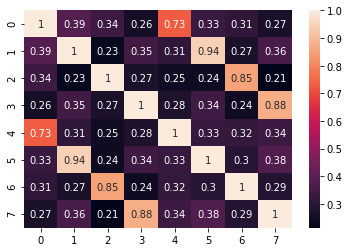

In [17]:
sns.heatmap(pd.DataFrame(pairwise_similarities), annot=True)

### Observations

This gives a much 
- YI had sections out of order. 
- HR is the tire-fire
- ST and RH both being in the 80s was surprising. 

In [18]:
text_df.text_cleaned

0        c  l he health reformer       r c     cy  ...
1     man   iii z onnasalpm twzi              iaa u...
2    kr ffiigno zintro issued weekly oakland  calif...
3    review herald  published weekly south st  paul...
4      health reformer editorial  reader  h  s  lay...
5       youth s instructor  humble man david was  a...
6    signs times   behold  come quickly  reward me ...
7    advent review  sabbath herald  patience saints...
Name: text_cleaned, dtype: object

## One more try with BERT


ImportError: cannot import name 'Dataset' from 'torch.utils.data' (unknown location)

In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
document_embeddings = sbert_model.encode(text_df.text_cleaned)

pairwise_similarities=cosine_similarity(document_embeddings)

In [ ]:
sns.heatmap(pd.DataFrame(pairwise_similarities), annot=True)

### Observations:
- YI has the highest similarity score - columns were correct but some of the sections were out of order
- SI is appropriately the second lowest, nearly tied with HR (which was garbage).

## BERT with sentences


In [ ]:
# https://www.sbert.net/index.html

document_embeddings = sbert_model.encode(text_df.text_cleaned_sent)
pairwise_similarities = cosine_similarity(document_embeddings)

In [ ]:
sns.heatmap(pd.DataFrame(pairwise_similarities), annot=True)

In [ ]:
text_df